# Jacob Evers - CPSC 5175
## Chapter 4, Questions 21-25

In [2]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use pandas to read the csv file
bank_train = pd.read_csv("C:/Users/jacob/Downloads/DSPR_Data_Sets/Website Data Sets/bank_marketing_training")
bank_train.shape

(26874, 21)

<ol start = 21> <li> Produce the following graphs. What is the strength of each graph? Weakness?
    <ol><li>Bar graph of "marital"
        <ol><li><em> This graph is useful to visualize the relative distribution between the different categories of "marital", but it doesn't provide any information about the difference in behaviors or responses between the categories</em></ol>
        <li>Bar graph of "marital", with overlay of "response".
            <ol><li><em> This graph's strength is similar to the previous graph, in that it shows the distribution between the two groups, but overlaying response doesn't tell us much about how the "response" variable was different between the marital categories.</em></ol>
            <li> Normalized bar graph of "marital", with overlay of "response".
                <ol><em><li> This one is useful because it shows the response normalized, so we can see how the response varies from one category to another. In this case, it appears that the response is very similar across all categories. The significant drawback of this graph is that we don't see any information about how many people were in each category, so if the data were to show differences between the categories, we would have to be very cautious with that information and not draw conclusions straight from that graph.</em></ol></ol></ol>

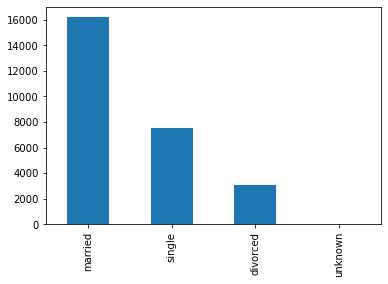

In [3]:
# Construct the bar graph for 21.a by counting the instances of each category of "marital" 
# and placing those counts in a bar chart
pd.value_counts(bank_train['marital']).plot(kind='bar')

# Create the contingency table with the "marital" and "response" variables that will be used for the next steps
crosstab_01 = pd.crosstab(bank_train['marital'], bank_train['response'])

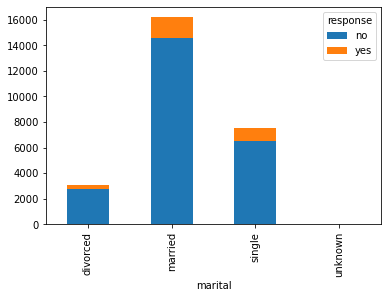

In [4]:
# Using the contingency table, create the stacked bar chart, overlaying "response" on "marital"
crosstab_01.plot(kind='bar', stacked = True)

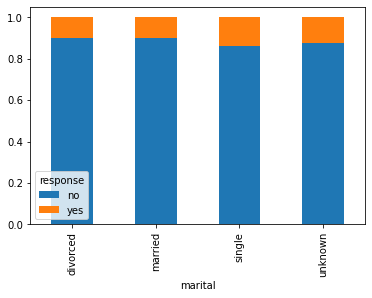

In [5]:
# Creating a normalized contingency table
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)

# Plotting the normalized table
crosstab_norm.plot(kind='bar', stacked = True)

<ol start = 22><li>Using the graph from exercise 21c, describe the relationship between "marital" and "response".
    <ol><li><em>The normalized chart suggests that marital status is not a good predictor for response
        </em></ol></ol>

<ol start = 23><li>Do the following with the variables marital and response.
<ol><li>Build a contingency table, being careful to have the correct variables representing the rows and columns. Report the counts and the column percentages.<ol><li><em> Please see the tables below for count and column percentage numbers</em></ol>
    <li>Describe what the contingency table is telling you.<ol><li><em> The table is showing us that the largest category for "marital" is "married", containing 16,187 total responses, followed by "single", then "divorced", and finally, "unknown". The percentage table is leading us to the same conclusion we got from the graphs, namely, that there is very little difference between the four groups regarding response percentage.</ol></ol>

In [6]:
# Create, then display the 
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['marital'])
crosstab_02

marital,divorced,married,single,unknown
response,,,,
no,2743,14579,6514,50
yes,312,1608,1061,7


In [7]:
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)

marital,divorced,married,single,unknown
response,,,,
no,89.8,90.1,86.0,87.7
yes,10.2,9.9,14.0,12.3



<p> 24. Repeat the previous exercise, this time reporting the row percentages. Explain the difference between the interpretation of this table and the previous contingency table.</p>
<p><em> Reading the row percentages will give the breakdown between "yes" and "no" responses, so for the entire data set, we have 87.5% responding "no", and 12.5% responding yes. </em></p>

<ol start = 25><li>Produce the following graphs. What is the strength of each graph? Weakness?
<ol><li>Histogram of duration.<ol><li><em> The histogram of duration shows that the vast majority of responses are within the 0-500 range, but doesn't give any information about the change in response with respect to duration.</em></ol>
<li>Histogram of duration, with overlay of response.
    <ol><li><em> This graph appears to show that response "yes" is increasing as the duration increases, but it's hard to know for sure because the 0-500 bar is so large that the rest of the graph is dwarfed.</em></ol>
    <li>Normalized histogram of duration, with overlay of response.
    <ol><em> This graph shows that the percentage of "yes" responses increases dramatically past the 500 day mark, but could potentially be misleading if not considered alongside the non-normalized graph, as it doesn't give any information about how many responses are within each bin.</ol></em></ol></ol>

(array([2.357e+04, 2.667e+03, 4.950e+02, 9.600e+01, 2.900e+01, 6.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <a list of 10 Patch objects>)

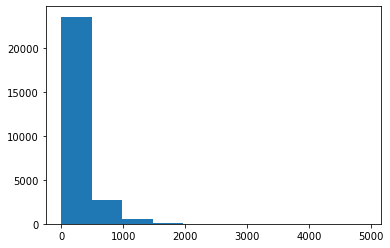

In [8]:
# 25A
# Count duration and plot the histogram
bt_duration = bank_train['duration']
plt.hist([bt_duration], bins = 10, stacked = False)

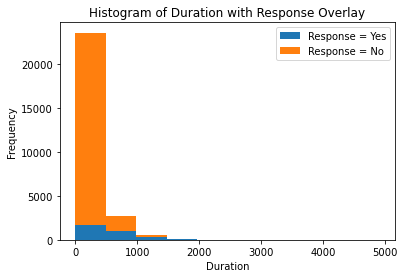

In [9]:
# 25B
# Calculate the proporotion of yes and no responses wrt duration, and create a histogram
bt_duration_y = bank_train[bank_train.response =='yes']['duration']
bt_duration_n = bank_train[bank_train.response == 'no']['duration']
(n, bins, patches) = plt.hist([bt_duration_y, bt_duration_n], bins = 10, stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Duration with Response Overlay')
plt.xlabel('Duration');plt.ylabel('Frequency');plt.show()

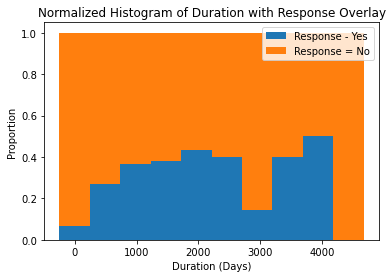

In [10]:
# 25C
# Normalize the data and create a histogram
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))
p1 = plt.bar(x = ourbins [:,0], height = n_norm[:,0], width = ourbins[:,1] - ourbins[:,0])
p2 = plt.bar(x = ourbins [:,0], height = n_norm[:,1], width = ourbins[:,1] - ourbins[:,0], bottom = n_norm[:,0])
plt.legend(['Response - Yes', 'Response = No'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('Duration (Days)'); plt.ylabel('Proportion'); plt.show() 

<p> 26. Using the graph from Exercise 25c, describe the relationship between duration and response.</p>
<p><em> Response sharply increases after the 500 day mark, and maintains that level until around 3000, where it dips again, before rising. The sample size for the responses on the higher end of the scale are significantly lower, so it is difficult to determine whether the dip around 3000 is valid.</p></em>

<ol start = 27> <li>Examine the non‐normalized and normalized histograms of duration, with overlay of response. Identify cutoff point(s) for duration, which separate low values of response from high values. Define a new categorical variable, duration_binned, using the cutoff points you identified.</ol>

<p> <em>Reviewing the normalized graph, it looks like the responses can be binned into three categories: 0-500 days, 501-2500 days, and 2500+</em> </p>

In [11]:
bank_train['duration_binned'] = pd.cut(x = bank_train['duration'], bins = [0, 501, 2500, 4500], 
                                       labels=["Under 500", "500 to 2500", "over 2500"], right = False)

<ol start=28><li>Provide the following. Describe each of the results.
<ol><li>Contingency table of duration_binned with response, with counts and column percentages.
<li>Non‐normalized bar graph of duration_binned, with response overlay.
<li>Normalized bar graph of duration_binned, with response overlay.
    </ol></ol>

In [12]:
# 28A
# Creating the contingency table of counts of "response" and "duration_binned"
crosstab_03 = pd.crosstab(bank_train['response'], bank_train['duration_binned'])
crosstab_03

duration_binned,Under 500,500 to 2500,over 2500
response,,,
no,22017,1860,8
yes,1657,1323,8


In [13]:
# Creating the contingency table with percentages
round(crosstab_03.div(crosstab_03.sum(0), axis = 1)*100, 1)

duration_binned,Under 500,500 to 2500,over 2500
response,,,
no,93.0,58.4,50.0
yes,7.0,41.6,50.0


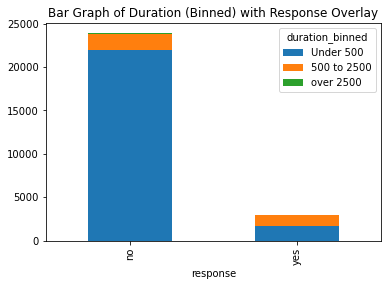

In [14]:
# 28B
# Creating the non-normalized bar graph of "duration_binned" with "response" overlaid
crosstab_03.plot(kind = 'bar', stacked = True, title = "Bar Graph of Duration (Binned) with Response Overlay")

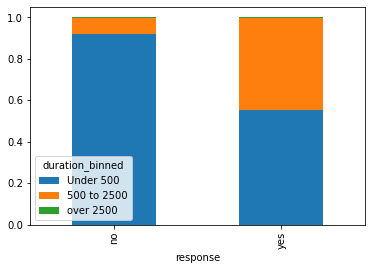

In [15]:
# 28C
# Normalizing the data and plotting it
crosstab_norm = crosstab_03.div(crosstab_03.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True)

<p>29. Construct a contingency table of job with response, with counts and column percentages.</p>

In [16]:
crosstab_04 = pd.crosstab(bank_train['response'], bank_train['job'])
crosstab_04

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,5903,5631,842,639,1680,852,825,2380,404,3972,573,185
yes,854,420,72,70,209,291,93,201,194,465,94,25


In [17]:
round(crosstab_04.div(crosstab_04.sum(0), axis = 1)*100, 1)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.4,93.1,92.1,90.1,88.9,74.5,89.9,92.2,67.6,89.5,85.9,88.1
yes,12.6,6.9,7.9,9.9,11.1,25.5,10.1,7.8,32.4,10.5,14.1,11.9


# Incomplete
<ol start=30><li>Referring to the previous exercise, do the following:<ol>
    <li>Combine the job categories according to the following response percentages: 0 < 10, 10 < 25, 25 < 33. Name the new variable job2.
<li>Provide a contingency table of job2 with response, with counts and column percentages. Describe what you see.
    <li>Provide a normalized histogram of job2 with response. Describe the relationship.</ol></ol>

In [18]:
crosstab_04.head

<bound method NDFrame.head of job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
response                                                                      
no          5903         5631           842        639        1680      852   
yes          854          420            72         70         209      291   

job       self-employed  services  student  technician  unemployed  unknown  
response                                                                     
no                  825      2380      404        3972         573      185  
yes                  93       201      194         465          94       25  >